### 实验设计
本文删除了代码的具体实现细节，将block个数减少，以看到更直观的数据。
下面的四个矩阵代表了训练的四种方式，前三个为针对droppath 网络的三个stage,每一个矩阵列代表每一个colomn中的卷积层(截图中从左往右数的四列)在不同训练阶段的dropout ratio，矩阵中行代表的是一个block，三行代表三个block的dropout ratio，此处其实是原论文中global droppath的一种实现。

下图的矩阵说明，block中每一个layer自顶向下dropout 神经元的概率为0-0.2，本次实验的实验组和对照组在block的drop上并没有差异。差异还是体现在globals系列文件对drop'path的概率从左至右为0，0.2，0.3，在stage2阶段变为（0，0，0.2）这个概率在每个阶段会向左迁移最终变成0，0，0。

In [5]:
PATHMATRIX = [[[0,0,0],[0.1,0.1,0.1],[0.2,0.2,0.2]],
              [[0,0,0],[0.1,0.1,0.1],[0.2,0.2,0.2]],
              [[0,0,0],[0.1,0.1,0.1],[0.2,0.2,0.2]],
              [[0,0,0],[0.1,0.1,0.1],[0.2,0.2,0.2]]]

### Droppath Stage1
- droppath ratio 分别设置为[0,0.2,0.3]
- learning rate 为0.001
- 迭代6000次


plot the train loss and test accuracy



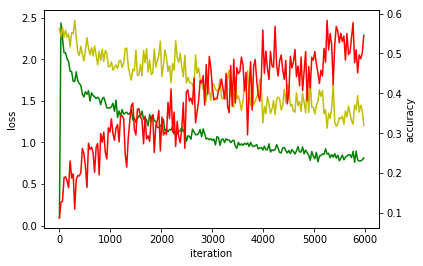

In [13]:
test_show(solverRoot1_0, 6000, 30, 30, 30)

### Droppath Stage2
- droppath ratio 分别设置为[0,0,0.2]
- learning rate 为0.001
- load上一阶段训练出来的模型，网络的架构都是一样的，只是每个layer的drop out ratio不同
- 迭代9000

snapshot found

plot the train loss and test accuracy



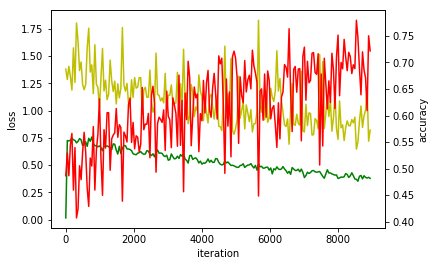

In [14]:
snapShot1 ='./phase0_iter_6000.solverstate.h5'
if os.path.isfile(snapShot1):
    print('snapshot found')
    
test_show(solverRoot1_1, 9000, 45, 45, 45,snapshot = snapShot1)

### Droppath Stage3
- droppath ratio 分别设置为[0,0,0]
- learning rate 为0.001
- 迭代9000

snapshot found

plot the train loss and test accuracy



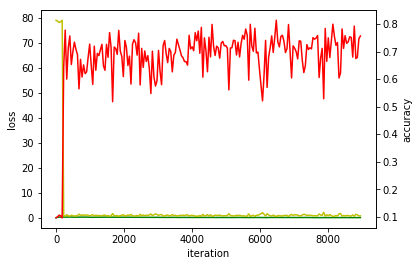

In [15]:
snapshot2 = 'phase1_iter_15000.solverstate.h5'
if os.path.isfile(snapshot2):
    print('snapshot found')
    
test_show(solverRoot1_2, 9000, 45, 45, 45,snapshot2)

### 非Droppath Stage1
- droppath ratio 分别设置为[0,0,0]
- learning rate 为0.001，直接迭代24000次


plot the train loss and test accuracy



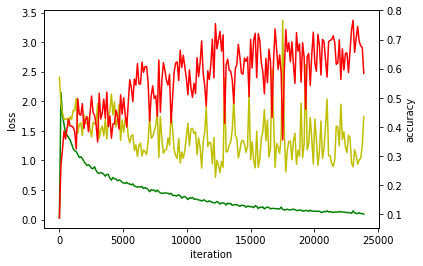

In [16]:
test_show(solverRoot2_0, 24000, 120, 120, 120)

### 非Droppath Stage2
- droppath ratio 分别设置为[0,0,0]
- learning rate 为0.0002
- 迭代6000

snapshot found

plot the train loss and test accuracy



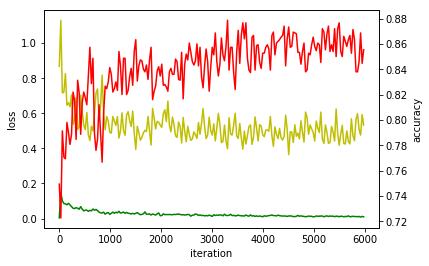

In [17]:
snapshot3 = 'phase3_iter_24000.solverstate.h5'
if os.path.isfile(snapshot3):
    print('snapshot found')
    
test_show(solverRoot2_1, 6000, 30, 30, 30,snapshot = snapshot3)

### Droppath Stage4
- droppath ratio 分别设置为[0,0,0]
- learning rate 为0.0001
- 迭代6000观察收敛性

snapshot4 found

plot the train loss and test accuracy



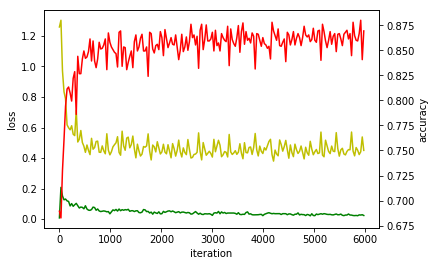

In [ ]:
snapshot4 = 'phase2_iter_24000.solverstate.h5'
if os.path.isfile(snapshot3):
    print('snapshot4 found')
    
test_show(solverRoot1_3, 6000, 30, 30, 30,snapshot = snapshot4)

### 非Droppath Stage3
- droppath ratio 分别设置为[0,0,0]
- learning rate 为0.0002
- 因为上一stage收敛不明显，因此想继续训练帮助判断

snapshot found

plot the train loss and test accuracy



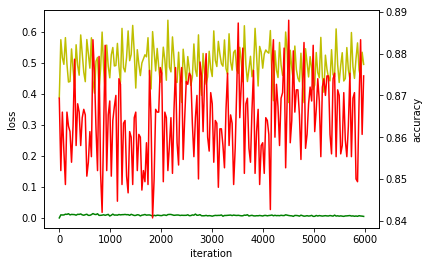

In [11]:
snapshot3 = 'phase3_iter_30000.solverstate.h5'
if os.path.isfile(snapshot3):
    print('snapshot found')
    
test_show(solverRoot2_1, 6000, 30, 30, 30,snapshot = snapshot3)

### Droppath Stage5
- droppath ratio 分别设置为[0,0,0]
- learning rate 为0.0001
- 也是为了判断到底收敛了没有

snapshot4 found

plot the train loss and test accuracy



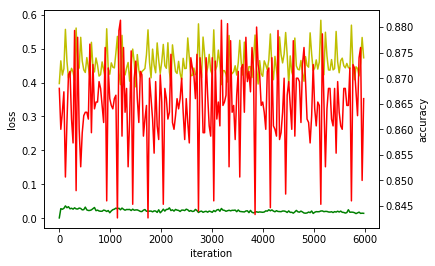

In [12]:
snapshot4 = 'phase2_iter_30000.solverstate.h5'
if os.path.isfile(snapshot3):
    print('snapshot4 found')
    
test_show(solverRoot1_3, 6000, 30, 30, 30,snapshot = snapshot4)

## 总结
- 从最终收敛的结果上来看，两个网络的收敛精度是没差的，都在0.88左右
- 从loss的结果上看，训练的loss（绿线）非droppath要比droppath要低，但是测试时候的loss却是droppath更低，性能稍好于非droppath
- droppath达到收敛所需要的迭代次数要比非droppath的迭代次数少（因为本次实验前24000次迭代两个网络的learning rate都是0.001，此后droppath以0.0001的学习速率很快接近收敛了，而非droppath则以0.0002的速率继续上升）
- 训练时间的对比没有加入到本次实验中，但本次实验和上次实验的对比也说明在深度不那么大的时候神经网络的精准度是可以更高的。